In [3]:
import pandas as pd
import numpy as np

In [4]:
btc_data = pd.read_csv('./btc_data.csv')
btc_1h_data = pd.read_csv('./btc_1h_data.csv')

In [5]:
btc_data.head()

,Timestamp,Date,Time,Open,High,Low,Close,Volume
0,2023-01-15 00:00:00,15/01/2023,00:00:00,20876.31,20898.00,20872.22,20887.33,192.84874
1,2023-01-15 00:01:00,15/01/2023,00:01:00,20887.33,20889.78,20875.34,20881.24,122.27002
2,2023-01-15 00:02:00,15/01/2023,00:02:00,20882.40,20884.02,20872.97,20874.46,64.88027
3,2023-01-15 00:03:00,15/01/2023,00:03:00,20873.41,20875.87,20863.02,20864.59,126.67576
4,2023-01-15 00:04:00,15/01/2023,00:04:00,20865.61,20867.27,20827.31,20844.88,309.61303


In [6]:
btc_1h_data.head()

,Unnamed: 0,open_time,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
0,2022-01-01 00:00:00,1.640995e+12,46216.93,46731.39,46208.37,46656.13,1503.33095,1.640999e+12,6.987999e+07,38608.0,806.06536,3.746216e+07,0.0
1,2022-01-01 01:00:00,1.640999e+12,46656.14,46949.99,46574.06,46778.14,943.81539,1.641002e+12,4.412715e+07,31872.0,491.18067,2.296327e+07,0.0
2,2022-01-01 02:00:00,1.641002e+12,46778.14,46928.94,46721.96,46811.77,485.16860,1.641006e+12,2.272067e+07,24364.0,206.35113,9.662607e+06,0.0
3,2022-01-01 03:00:00,1.641006e+12,46811.77,46916.63,46760.12,46813.20,562.88971,1.641010e+12,2.636326e+07,19882.0,248.28212,1.162938e+07,0.0
4,2022-01-01 04:00:00,1.641010e+12,46813.21,46887.33,46591.23,46711.05,861.88389,1.641013e+12,4.027204e+07,23357.0,397.53563,1.857540e+07,0.0


In [7]:
btc_data.shape

(403121, 8)

In [13]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403121 entries, 0 to 403120
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  403121 non-null  object 
 1   Date       403121 non-null  object 
 2   Time       403121 non-null  object 
 3   Open       403121 non-null  float64
 4   High       403121 non-null  float64
 5   Low        403121 non-null  float64
 6   Close      403121 non-null  float64
 7   Volume     403121 non-null  float64
dtypes: float64(5), object(3)
memory usage: 24.6+ MB


In [8]:
btc_data['Timestamp'].min(), btc_data['Timestamp'].max()

('2023-01-15 00:00:00', '2023-10-22 00:00:00')

In [85]:
features = ['Timestamp', 'Open', "High", "Low", "Close", "Volume"]
X = btc_data[features].copy(deep=True)
X['Timestamp'] = pd.to_datetime(X['Timestamp'], format=date_format)

In [65]:
X.head()

,Timestamp,Open,High,Low,Close,Volume
0,2023-01-15 00:00:00,20876.31,20898.00,20872.22,20887.33,192.84874
1,2023-01-15 00:01:00,20887.33,20889.78,20875.34,20881.24,122.27002
2,2023-01-15 00:02:00,20882.40,20884.02,20872.97,20874.46,64.88027
3,2023-01-15 00:03:00,20873.41,20875.87,20863.02,20864.59,126.67576
4,2023-01-15 00:04:00,20865.61,20867.27,20827.31,20844.88,309.61303


In [41]:
# for i in range(X.shape[0] - 1):
#     if X.Timestamp.iloc[i] > X.Timestamp.iloc[i + 1]:
#         break
#         print('Non monotonic')
    
#     if (X.Timestamp.iloc[i + 1] -X.Timestamp.iloc[i]) != timedelta(minutes=1):
#         break
#         print('Non monotonic')

In [86]:
def create_features_from_previos_5_min(X):
    """X is increasing by timestamp"""
    for i in range(1, 6):
        for feature in ['Open', "High", "Low", "Close", "Volume"]:
            X[f'{feature}_{i}min_before'] = X[feature].shift(i)
    return X
X = create_features_from_previos_5_min(X)
X = X.dropna()
y = X['Close'].copy(deep=True)
X = X.drop(columns=['Close', 'High', 'Low', 'Volume'])
X.head()

,Timestamp,Open,Open_1min_before,High_1min_before,Low_1min_before,Close_1min_before,Volume_1min_before,Open_2min_before,High_2min_before,Low_2min_before,...,Open_4min_before,High_4min_before,Low_4min_before,Close_4min_before,Volume_4min_before,Open_5min_before,High_5min_before,Low_5min_before,Close_5min_before,Volume_5min_before
5,2023-01-15 00:05:00,20843.72,20865.61,20867.27,20827.31,20844.88,309.61303,20873.41,20875.87,20863.02,...,20887.33,20889.78,20875.34,20881.24,122.27002,20876.31,20898.00,20872.22,20887.33,192.84874
6,2023-01-15 00:06:00,20866.37,20843.72,20870.53,20828.28,20866.37,179.98974,20865.61,20867.27,20827.31,...,20882.40,20884.02,20872.97,20874.46,64.88027,20887.33,20889.78,20875.34,20881.24,122.27002
7,2023-01-15 00:07:00,20911.06,20866.37,20927.83,20859.64,20911.12,481.11856,20843.72,20870.53,20828.28,...,20873.41,20875.87,20863.02,20864.59,126.67576,20882.40,20884.02,20872.97,20874.46,64.88027
8,2023-01-15 00:08:00,20891.43,20911.06,20911.06,20886.84,20890.85,196.06623,20866.37,20927.83,20859.64,...,20865.61,20867.27,20827.31,20844.88,309.61303,20873.41,20875.87,20863.02,20864.59,126.67576
9,2023-01-15 00:09:00,20894.10,20891.43,20904.68,20889.55,20894.10,104.67781,20911.06,20911.06,20886.84,...,20843.72,20870.53,20828.28,20866.37,179.98974,20865.61,20867.27,20827.31,20844.88,309.61303


In [50]:
from datetime import datetime, timedelta

In [53]:
date_format = '%Y-%m-%d %H:%M:%S'

In [54]:
X['Timestamp'].max() - timedelta(10)

Timestamp('2023-10-12 00:00:00')

In [87]:
testing_days = 10
testing_thresh = X['Timestamp'].max() - timedelta(testing_days)

# mask to grab the days for training and testing
training_mask = X.Timestamp <= testing_thresh
testing_mask = X.Timestamp > testing_thresh
X = X.drop(columns=['Timestamp'])

# subset and make training and validation sets
X_train, X_val, y_train, y_val = X[training_mask], X[testing_mask], y[training_mask], y[testing_mask] #train_test_split(X, y, test_size=0.20, random_state=0, shuffle=True, stratify=X['stock_id']) # random_state=8
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((388716, 26), (14400, 26), (388716,), (14400,))

In [69]:
from catboost import CatBoostRegressor
from catboost import EShapCalcType, EFeaturesSelectionAlgorithm
from catboost import Pool
from sklearn.metrics import mean_absolute_error

In [70]:
train_pool = Pool(data=X_train, label=y_train)
val_pool = Pool(data=X_val, label=y_val)

In [73]:
# params = dict(loss_function='MAE',
#               score_function='Cosine',
#               eval_metric = 'MAE',
#               metric_period=100,
#               task_type='GPU',
#               od_type='Iter',
#               od_wait=20,
#               verbose=200,
#               random_seed=7,
#               border_count=32,
#               use_best_model=True,
#               bootstrap_type='Bernoulli',
#               subsample=0.90,
#               random_strength=3, # more bagging to reduce overfitting
#               depth=9,
#               l2_leaf_reg=8,
#               learning_rate=0.057,
#               )

print("--------------Performing Feature Selection----------------")
# model = CatBoostRegressor(**params)
model = CatBoostRegressor()

--------------Performing Feature Selection----------------


In [76]:
final_model = CatBoostRegressor(**params)
final_model = CatBoostRegressor()
final_model.fit(X_train, #[summary['selected_features_names']],  # 
                y_train,
               eval_set=(X_val, y_val)) # [summary['selected_features_names']]

print("-----Predicting with the reduced set model-----------")
y_val_pred = final_model.predict(X_val) # [summary['selected_features_names']]
y_val_mae = mean_absolute_error(y_val, y_val_pred)
print(f"MAE on validation set: {np.round(y_val_mae, 4)}")

Learning rate set to 0.129858
0:	learn: 2307.9228813	test: 1299.6396251	best: 1299.6396251 (0)	total: 51.4ms	remaining: 51.3s
1:	learn: 2016.9343250	test: 1123.5827835	best: 1123.5827835 (1)	total: 87.9ms	remaining: 43.9s
2:	learn: 1764.6932513	test: 963.5236418	best: 963.5236418 (2)	total: 124ms	remaining: 41.2s
3:	learn: 1542.5158881	test: 844.2888987	best: 844.2888987 (3)	total: 160ms	remaining: 39.8s
4:	learn: 1350.3286625	test: 718.1421504	best: 718.1421504 (4)	total: 194ms	remaining: 38.7s
5:	learn: 1180.7641780	test: 632.4638146	best: 632.4638146 (5)	total: 229ms	remaining: 37.9s
6:	learn: 1033.9614951	test: 546.4524853	best: 546.4524853 (6)	total: 263ms	remaining: 37.3s
7:	learn: 904.9986610	test: 480.5982161	best: 480.5982161 (7)	total: 294ms	remaining: 36.5s
8:	learn: 792.3422330	test: 408.5237840	best: 408.5237840 (8)	total: 333ms	remaining: 36.7s
9:	learn: 695.2585859	test: 352.0351971	best: 352.0351971 (9)	total: 375ms	remaining: 37.1s
10:	learn: 609.8139832	test: 306.6430

In [79]:
final_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Low_3min_before,15.015504
1,High_1min_before,9.494351
2,Low_5min_before,9.224840
3,Close_4min_before,8.825785
4,Low_4min_before,6.993847
5,High_4min_before,6.647546
6,High_5min_before,6.534475
7,Open_5min_before,6.391401
8,Low_1min_before,4.262893
9,Close_5min_before,3.934216


In [77]:
mean_absolute_error(y_val, X_val['Close_1min_before'])

8.581495833333356

In [80]:
mean_absolute_error(y, X['Close_1min_before'])

8.732093194018614

In [117]:
from sklearn.linear_model import LinearRegression, Ridge, SGDClassifier

In [118]:
linear_model = LinearRegression()
linear_model.fit(X_train, #[summary['selected_features_names']],  # 
                y_train) # [summary['selected_features_names']]

print("-----Predicting with the reduced set model-----------")
y_val_pred = linear_model.predict(X_val) # [summary['selected_features_names']]
y_val_mae = mean_absolute_error(y_val, y_val_pred)
print(f"MAE on validation set: {np.round(y_val_mae, 4)}")
print(f"baseline MAE on validation set: {np.round(mean_absolute_error(y_val, X_val['Close_1min_before']), 4)}")


-----Predicting with the reduced set model-----------
MAE on validation set: 8.6108
baseline MAE on validation set: 8.5815


In [107]:
linear_model.coef_, linear_model.intercept_

(array([ 5.28821382e-01, -1.34892879e-01, -1.83670590e-02,  1.62428125e-02,
         4.90220405e-01,  1.35264150e-03,  3.17308954e-01,  1.17343640e-02,
        -1.65024884e-02,  1.07900640e-01, -7.36345528e-04, -1.95215762e-01,
        -2.95897305e-02, -1.06487619e-02, -2.90189160e-01,  5.16215037e-04,
        -1.14009487e-01,  1.87318664e-02, -7.33027189e-03,  2.08591998e-01,
        -1.20859546e-03, -1.59885045e-02,  1.81535096e-02,  8.23722542e-03,
         1.06774734e-01,  1.92478308e-04]),
 0.3628515361051541)

In [112]:
X.columns

Index(['Open', 'Open_1min_before', 'High_1min_before', 'Low_1min_before',
       'Close_1min_before', 'Volume_1min_before', 'Open_2min_before',
       'High_2min_before', 'Low_2min_before', 'Close_2min_before',
       'Volume_2min_before', 'Open_3min_before', 'High_3min_before',
       'Low_3min_before', 'Close_3min_before', 'Volume_3min_before',
       'Open_4min_before', 'High_4min_before', 'Low_4min_before',
       'Close_4min_before', 'Volume_4min_before', 'Open_5min_before',
       'High_5min_before', 'Low_5min_before', 'Close_5min_before',
       'Volume_5min_before'],
      dtype='object')

In [119]:
linear_model = Ridge()
linear_model.fit(X_train, #[summary['selected_features_names']],  # 
                y_train) # [summary['selected_features_names']]

print("-----Predicting with the reduced set model-----------")
y_val_pred = linear_model.predict(X_val) # [summary['selected_features_names']]
y_val_mae = mean_absolute_error(y_val, y_val_pred)
print(f"MAE on validation set: {np.round(y_val_mae, 4)}")
print(f"baseline MAE on validation set: {np.round(mean_absolute_error(y_val, X_val['Close_1min_before']), 4)}")

y_train_mae = mean_absolute_error(y, linear_model.predict(X))
print(f"MAE on train set: {np.round(y_train_mae, 4)}")
print(f"baseline MAE on train set: {np.round(mean_absolute_error(y, X['Close_1min_before']), 4)}")

-----Predicting with the reduced set model-----------
MAE on validation set: 8.6108
baseline MAE on validation set: 8.5815
MAE on train set: 8.7453
baseline MAE on train set: 8.7321


In [121]:
# linear_model = SGDClassifier(penalty='l1')
# linear_model.fit(X_train, #[summary['selected_features_names']],  # 
#                 y_train) # [summary['selected_features_names']]

# print("-----Predicting with the reduced set model-----------")
# y_val_pred = linear_model.predict(X_val) # [summary['selected_features_names']]
# y_val_mae = mean_absolute_error(y_val, y_val_pred)
# print(f"MAE on validation set: {np.round(y_val_mae, 4)}")
# print(f"baseline MAE on validation set: {np.round(mean_absolute_error(y_val, X_val['Close_1min_before']), 4)}")

# y_train_mae = mean_absolute_error(y, linear_model.predict(X))
# print(f"MAE on train set: {np.round(y_train_mae, 4)}")
# print(f"baseline MAE on train set: {np.round(mean_absolute_error(y, X['Close_1min_before']), 4)}")

In [122]:
import matplotlib.pyplot as plt

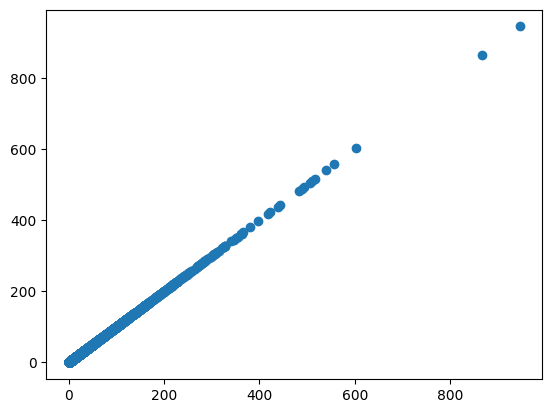

In [129]:
# plt.hist(np.abs((y -X['Close_1min_before']).to_numpy()), bins=100)
plt.scatter(np.abs((y -X['Close_1min_before']).to_numpy()), np.abs((y -X['Close_1min_before']).to_numpy()))

In [134]:
np.percentile(np.abs((y -X['Close_1min_before'])), 90)

20.389999999999418

In [146]:
np.percentile(np.abs((y_train -X_train['Close_1min_before'])), 80)

13.450000000000728

In [147]:
mask_filtered_X = np.abs(y_train -X_train['Close_1min_before']) < np.percentile(np.abs((y_train -X_train['Close_1min_before'])), 80)

In [148]:
X_filtered, y_filtered = X_train[mask_filtered_X], y_train[mask_filtered_X]

In [153]:
linear_model = Ridge()
linear_model.fit(X_filtered, #[summary['selected_features_names']],  # 
                y_filtered) # [summary['selected_features_names']]

print("-----Predicting with the reduced set model-----------")
y_val_pred = linear_model.predict(X_val) # [summary['selected_features_names']]
y_val_mae = mean_absolute_error(y_val, y_val_pred)
print(f"MAE on validation set: {np.round(y_val_mae, 4)}")
print(f"baseline MAE on validation set: {np.round(mean_absolute_error(y_val, X_val['Close_1min_before']), 4)}")
print(f"baseline2 MAE on validation set: {np.round(mean_absolute_error(y_val, 0.5 * (X_val['Close_1min_before'] + X_val['Open'])), 4)}")

y_train_mae = mean_absolute_error(y_filtered, linear_model.predict(X_filtered))
print(f"MAE on train set: {np.round(y_train_mae, 4)}")
print(f"baseline MAE on train set: {np.round(mean_absolute_error(y_filtered, X_filtered['Close_1min_before']), 4)}")
print(f"baseline2 MAE on train set: {np.round(mean_absolute_error(y_filtered, 0.5 * (X_filtered['Close_1min_before'] + X_filtered['Open'])), 4)}")

-----Predicting with the reduced set model-----------
MAE on validation set: 8.5923
baseline MAE on validation set: 8.5815
baseline2 MAE on validation set: 8.5814
MAE on train set: 4.4498
baseline MAE on train set: 4.4427
baseline2 MAE on train set: 4.4426


In [152]:
linear_model.coef_

array([ 1.70222287e-01, -3.83082507e-02,  5.33910577e-03,  3.03697961e-03,
        8.18399004e-01, -1.98564982e-05,  1.75468642e-02, -4.10890071e-03,
       -1.79073108e-03,  3.37835408e-02,  2.83947262e-04,  6.42028990e-02,
       -9.77925739e-03, -5.22109826e-03, -4.52165686e-03,  4.66188921e-04,
        5.32287315e-02,  2.91560534e-04, -3.72007478e-04, -5.73121957e-02,
       -3.08058762e-04,  9.96471636e-03, -2.71538439e-03, -9.92899480e-03,
       -4.19498935e-02, -4.28443951e-04])